## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_data= pd.merge(mouse_metadata,study_results,on="Mouse ID", how="outer")

# Display the data table for preview
comb_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_metadata["Mouse ID"].value_counts())

249

In [3]:
comb_data.count()

Mouse ID               1893
Drug Regimen           1893
Sex                    1893
Age_months             1893
Weight (g)             1893
Timepoint              1893
Tumour Volume (mm3)    1893
Metastatic Sites       1893
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = comb_data[comb_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse 
duplicate_mouse_ID= comb_data.loc[comb_data["Mouse ID"]=='g989', :]
duplicate_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_comb_data= comb_data.drop_duplicates(subset = ["Mouse ID","Timepoint"])
clean_comb_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_comb_data.count()

Mouse ID               1888
Drug Regimen           1888
Sex                    1888
Age_months             1888
Weight (g)             1888
Timepoint              1888
Tumour Volume (mm3)    1888
Metastatic Sites       1888
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
drug_name = clean_comb_data.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
mean_tumour=drug_name["Tumour Volume (mm3)"].mean()
median_tumour=drug_name["Tumour Volume (mm3)"].median()
variance_tumour=drug_name["Tumour Volume (mm3)"].var()
std_tumour=drug_name["Tumour Volume (mm3)"].std()
sem_tumour=drug_name["Tumour Volume (mm3)"].sem()
drug_summary= pd.DataFrame({ "Mean Tumor Volume":mean_tumour, 
                                    "Median Tumor Volume": median_tumour, 
                                    "Variance Tumor Volume": variance_tumour, 
                                    "Standard Deviation Tumor Volume": std_tumour,
                                     "SEM Tumor Volume":sem_tumour
    
    
})
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_agg = drug_name["Tumour Volume (mm3)"].agg(["mean", "median","var","std","sem"])
drug_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

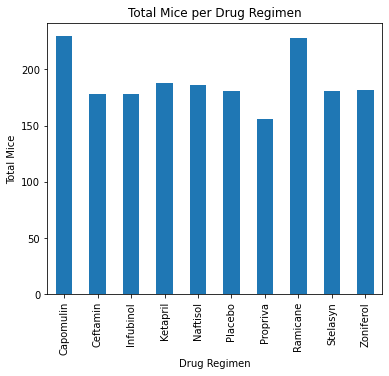

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_count= drug_name["Mouse ID"].count()
drug_plot_1= drug_regimen_count.plot(kind="bar", figsize=(6,5), title="Total Mice per Drug Regimen")
drug_plot_1.set_xlabel("Drug Regimen")
drug_plot_1.set_ylabel("Total Mice")
drug_plot_1




<function matplotlib.pyplot.show(*args, **kw)>

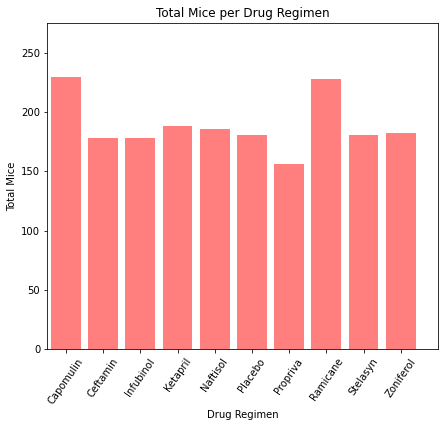

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(drug_regimen_count))
y_axis = drug_regimen_count
ticks= list(drug_regimen_count.index.values)
tick_locations= [value for value in x_axis]
plt.figure(figsize=(7,6))
plt.bar(x_axis, y_axis, color ='red', alpha=0.5, align="center")
plt.xticks(tick_locations, ticks,rotation="55")
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, 275)
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
plt.show

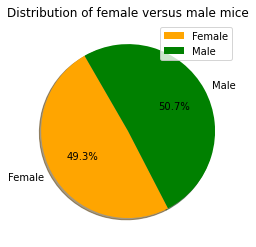

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender= clean_comb_data.groupby(["Sex"]).count()
colours= ["orange", "green"]
mice_pieplot = mice_gender.plot(kind="pie", y = "Mouse ID", title= "Distribution of female versus male mice", colors= colours, autopct= "%1.1f%%", shadow= True, startangle=120)

mice_pieplot.set_ylabel("")
mice_pieplot.legend(loc="upper right")
plt.show()


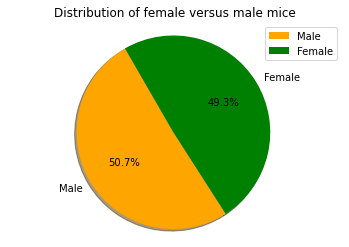

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = clean_comb_data["Sex"].value_counts()

explode = [0,0]
mice_gender_labels = list(mice_gender.index)
plt.pie(mice_gender, explode=explode, labels=mice_gender_labels, colors = colours,
        autopct="%1.1f%%", shadow=True, startangle=120) 
plt.title("Distribution of female versus male mice")
plt.legend(mice_gender_labels, loc='upper right')
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint_mouse = clean_comb_data.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint_mouse


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [15]:
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
max_timepoint_mouse_df = pd.merge(max_timepoint_mouse , clean_comb_data, on=(["Mouse ID","Timepoint"]))
max_timepoint_mouse_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]
    
# Create empty list to fill with tumour vol data (for plotting)

tumour_vol_data=[]


# Locate the rows which contain mice on each drug and get the tumour volumes
    
for treatment in treatments:
    data_regimen= max_timepoint_mouse_df.loc[max_timepoint_mouse_df["Drug Regimen"]==treatment]
    tumor_vol=  data_regimen["Tumour Volume (mm3)"]
    
    tumour_vol_data.append( tumor_vol)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile0=  tumour_vol_data[0].quantile([.25,.5,.75])
lowerq0 =quartile0[.25]
upperq0= quartile0[.75]
IQR0 = upperq0-lowerq0
    
    
quartile1=  tumour_vol_data[1].quantile([.25,.5,.75])
lowerq1 =quartile1[.25]
upperq1= quartile1[.75]
IQR1 = upperq1-lowerq1
    
quartile2=  tumour_vol_data[2].quantile([.25,.5,.75])
lowerq2 =quartile2[.25]
upperq2= quartile2[.75]
IQR2 = upperq2-lowerq2   
 
quartile3=  tumour_vol_data[3].quantile([.25,.5,.75])
lowerq3 =quartile3[.25]
upperq3= quartile3[.75]
IQR3 = upperq3-lowerq3 
    # Determine outliers using upper and lower bounds
lower_bound0=lowerq0-(1.5*IQR0)
upper_bound0=upperq0+(1.5*IQR0)
print(lower_bound0,upper_bound0)

lower_bound1=lowerq1-(1.5*IQR1)
upper_bound1=upperq1+(1.5*IQR1)   
print(lower_bound1,upper_bound1)

lower_bound2=lowerq2-(1.5*IQR2)
upper_bound2=upperq2+(1.5*IQR2)  
print(lower_bound2,upper_bound2)

lower_bound3=lowerq3-(1.5*IQR3)
upper_bound3=upperq3+(1.5*IQR3)
print(lower_bound3,upper_bound3)


20.70456164999999 51.83201549
17.912664470000003 54.30681135
36.83290494999999 82.74144559000001
25.355449580000002 87.66645829999999


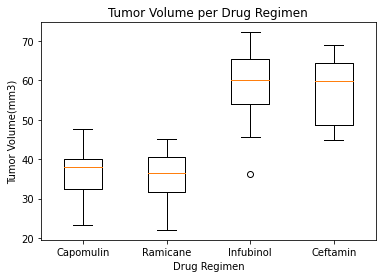

In [17]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
fig1, ax1= plt.subplots()
ax1.set_title("Tumor Volume per Drug Regimen")
ax1.set_ylabel("Tumor Volume(mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(  tumour_vol_data, labels = treatments)
plt.show()

## Line and Scatter Plots

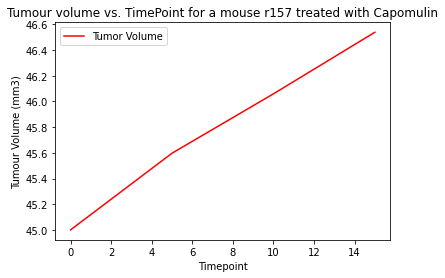

In [18]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
mouse_capomulin= clean_comb_data.loc[clean_comb_data["Drug Regimen"]=="Capomulin"]
mouse_capomulin

mouse_r157 = clean_comb_data.loc[clean_comb_data["Mouse ID"]=="r157"]
mouse_r157
line_plot_x= mouse_r157["Timepoint"]
line_plot_y= mouse_r157["Tumour Volume (mm3)"]
plt.plot(line_plot_x, line_plot_y,color= "red", label= "Tumor Volume")
plt.legend(loc="best")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Tumour volume vs. TimePoint for a mouse r157 treated with Capomulin")
plt.show()

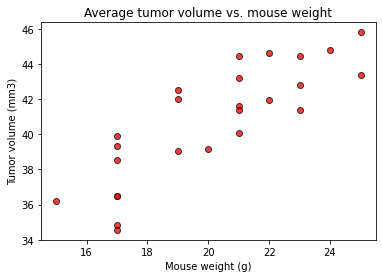

In [19]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
mean_mouseid= mouse_capomulin.groupby(["Mouse ID"]).mean()
mean_mouseid

avg_weight= mean_mouseid["Weight (g)"]
avg_vol= mean_mouseid["Tumour Volume (mm3)"]

plt.scatter(avg_weight, avg_vol, marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
plt.show()

## Correlation and Regression

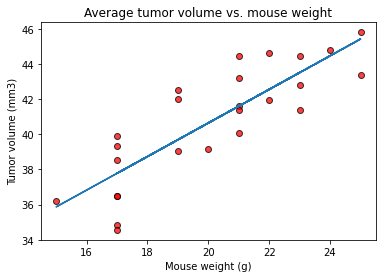

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
correlation = st.pearsonr(avg_weight,avg_vol)

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight,avg_vol)
regress_values = avg_weight * slope + intercept
plt.scatter(avg_weight, avg_vol, marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.plot(avg_weight,regress_values)
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
plt.show()
